# Lecture 05 - Functional programming

In this lecture:  
1. [Programming paradigms](#programming-paradigms)  
2. [Functional programming concepts](#functional-programming-concepts)  
    * [First-class and high-order functions](#first-class-and-high-order-functions)  
        - [Map](#mapping), [reduce](#reducing), [filter](#filtering), [list comprehension](#list-comprehension), [generator expressions](#generator-expressions)  
    * [Recursion](#recursion)  
    * [Type systems](#type-systems)  
    * [Strict vs. lazy evaluation](#lazy-evaluation)  

## Programming paradigms

In computer science, we can classify programming languages according to **programming paradigms**. Programming languages belong to a certain programming paradigm according to their features. 

We already mentioned the two most common programming paradigms in Lecture 1, meaning the _imperative_ and _declarative_ paradigms. 
In the imperative paradigm the programmer instructs the machine on **how** to change its state; in the declarative paradigm the programmer merely declares **what** properties the desired result should have , but not how to compute it. You can read a useful "chocolate cake" example here [https://dev.to/ruizb/declarative-vs-imperative-4a7l#introduction].


Today we will go through one subcategory of the declarative programming paradigm called **functional programming**. (Remember that Python is an **object-oriented** programming language that is thus imperative, but also supports declarative features).

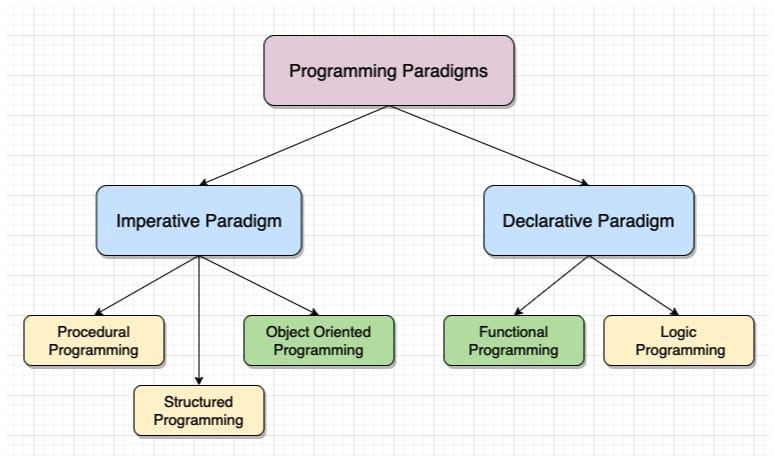


Image source: [https://medium.com/@Ariobarxan/what-is-a-programming-paradigm-ec6c5879952b]

In functional programming the desired result of a program is constructed by **applying and composing functions**. In this declarative programming paradigm, function definitions are trees of expressions that **map** values to other values, rather than a sequence of imperative statements which update the running state of the program.

It is possible to use a functional style of programming in languages that are not traditionally considered functional languages. Indeed, Python has support for _lambda_, _map_, _reduce_ and _filter_ operations.

(You can find a more in-depth discussion on the topic on Wikipedia: [https://en.wikipedia.org/wiki/Functional_programming]).

## Functional programming concepts

A number of concepts are specific to functional programming. 
- First-class and high-order functions
- Recursion
- Type systems
- Strict vs. lazy evaluation
- Pure functions (not treated in this course)
- Data structures (not treated in this course)
- Referential transparency (not treated in this course)

### First-class and high-order functions

#### Treating functions as objects

In functional programming, functions are treated as _first-class citizens_: a first-class citizen is an entity which supports all the operations generally available to other entities, such as
variable assignment, being passed as argument and be returned from other functions, just as any other data type can. This allows programs to be written in a declarative and composable style, where small functions are combined in a **modular** manner.
A _higher-order_ function is a function that can take as argument another function.

In [42]:
def makeList(a, b):
    return [a, b]

myVariable = makeList

myVariable(1, 2)

[1, 2]

In [43]:
def applyFunction(fun, a, b):
    return fun(a, b)

applyFunction(makeList, 1, 2)

[1, 2]

### Recursion

In computer science, recursion is a method of solving a computational problem where the solution depends on solutions to smaller instances of the same problem up to a _base case_. Recursion solves such recursive problems by using functions that call themselves from within their own code. 

In [46]:
def fun(x):
    if len(x) > 1:
        return fun(x[1:])
    return x

fun([1, 2, 3, 4])

[4]

### Type systems

#### Typed lambda calculus

`lambda` functions are small, anonimized (i.e. nameless) functions that can take any number of arguments but output only one value. They are useful when they are used as an argument for another function or reside inside another function; hence, they are meant to be used only for one instance at a time.

In [49]:
# lambda is the keyword, x is the parameter of the function
myFunction = lambda x: f'This value is {x}'

list(map(myFunction, range(3)))

['This value is 0', 'This value is 1', 'This value is 2']

In [50]:
import numpy as np

ary = np.random.random(7)
ary

array([0.31008344, 0.89814698, 0.6926857 , 0.04018681, 0.15129277,
       0.95715079, 0.78544843])

In [51]:
list(map(lambda x: f'{x:.2f}', ary))

['0.31', '0.90', '0.69', '0.04', '0.15', '0.96', '0.79']

In [52]:
from functools import reduce

reduce(lambda x, y: x + y, range(10))

45

In [53]:
myFun = lambda x: x > 10 and 'larger or equal 10' or 'smaller 10'

list(map(myFun, range(8, 13)))

['smaller 10',
 'smaller 10',
 'smaller 10',
 'larger or equal 10',
 'larger or equal 10']

In [54]:
lst = [(4, 'a'), (1, 'a'), ('3', 'c'), (1, 'b'), (2, 'd'), (3, 'e')]

sorted(lst, key = lambda x: x[1])

[(4, 'a'), (1, 'a'), (1, 'b'), ('3', 'c'), (2, 'd'), (3, 'e')]

### Mapping

`map` is the name of a high-order function that applies a given function to each element of a collection returning the results in a collection of the same type.

In [57]:
def myMapper(f, collection):
    res = list()
    for el in collection:
        res.append(f(el))
    return res

myMapper(str, [1, 2, 3, 4, 5])

['1', '2', '3', '4', '5']

In [58]:
map(str, range(1, 6))

In [59]:
list(map(str, range(1, 6)))

['1', '2', '3', '4', '5']

In [60]:
import numpy as np

ary = np.random.random(3)
ary

array([0.79837889, 0.4072339 , 0.45373593])

In [61]:
list(map(str, ary))

['0.7983788882995173', '0.40723389715804503', '0.45373593364611475']

In [62]:
square = lambda x: x ** 2
double = lambda x: x + x
items = [0, 1, 2, 3, 4]
print(list(map(square, items)))
print(list(map(double, items)))

[0, 1, 4, 9, 16]
[0, 2, 4, 6, 8]


In [63]:
funcs = [square, double]
for i in items:
    value = list(map(lambda items: items(i), funcs))
    
print(value)

[16, 8]


### Reducing

`reduce` is a method that applies a function of two arguments cumulatively to the items in sequence, from left to right, to reduce the sequence to a single value.

In [66]:
from functools import reduce

def addition(a, b):
    return a + b

reduce(addition, range(10))

45

In [67]:
numbers = list(range(10))
reduce(lambda x, y: x + y, numbers)

45

In [68]:
sample_list = [1, 2, 3, 4, 5]

sum = reduce(lambda x, y: x + y, sample_list)

print(sum)
print(((((1 + 2)+ 3) + 4)+ 5))

15
15


### Filtering

`filter` is a high-order function that processes a data structure (usually a list) in some order to produce a new data structure containing exactly those elements of the original data structure for which a given predicate returns the boolean value `True`.

In [71]:
list(filter(lambda x: x > 10, range(8, 13)))

[11, 12]

### List comprehension

List comprehensions are an elegant way to define and create lists based on existing lists. They have a very simple syntax:

`newList = [ expression(element) for element in oldList if condition ] `.

They are often a simpler and more elegant alternative to `for` loops.

In [74]:
# With for loop
odd_nums = []
for x in range(10):
    if x % 2 == 1:
        odd_nums.append(x)
print(odd_nums)


# With list comprehension
[x for x in range(10) if x % 2 == 1]

[1, 3, 5, 7, 9]


[1, 3, 5, 7, 9]

In [75]:
my_list = [1, 'c', 1.0, 'Hello World', 'a', 2, 4, 'b', 3.9]

[x for x in my_list if type(x) == str]

['c', 'Hello World', 'a', 'b']

In [76]:
[[x] for x in my_list if type(x) == str]

[['c'], ['Hello World'], ['a'], ['b']]

Both list comprehensions and lambda functions can obtain the same elegant result when working on lists, but usually list comprehensions are more human readable.

### Generator expressions

Generator functions are a special kind of function that returns a lazy iterator, called `yield`. These are objects that you can loop over like a list. However, unlike lists, lazy iterators do not store their contents in memory, thus being very useful when working with large amounts of data. 
Generator expressions have a very similar syntax to list comprehensions:

In [80]:
([x] for x in my_list if type(x) == str)

<generator object <genexpr> at 0x161681220>

We use the `next()` special method to loop over the contents of a generator: when we call `next()` on the generator, the code within the generator expression is executed up to the `yield` statement. When the Python `yield` statement is hit, the program suspends function execution and returns the yielded value to the caller (vs the `return` statement, which triggers the stop execution of the function). When a function is suspended, the **state** of that function is saved.

In [82]:
# List comprehension
nums_squared_lc = [num**2 for num in range(5)]

# Generator expression
nums_squared_gc = (num**2 for num in range(5))

In [83]:
def nums_squared_gc_func(n):
    for i in range(n):
        yield i**2

In [84]:
list(nums_squared_gc_func(5))

[0, 1, 4, 9, 16]

In [85]:
print(next(nums_squared_gc))
print(next(nums_squared_gc))
print(next(nums_squared_gc))

0
1
4


### Lazy evaluation

We have already seen the concept of lazy evaluation when we dealt with how Boolean expressions are evaluated in Python. But lazy evaluation is actually applied whenever possible.


Lazy evaluation is a concept in functional programming that refers to how function arguments are processed **only** when an expression is being evaluated. Lazy evaluation does not evaluate function arguments unless their values are required to evaluate the function call itself.

In [88]:
([x] for x in my_list if type(x) == str)

<generator object <genexpr> at 0x161680d40>

In [89]:
my_gen = ([x] for x in my_list if type(x) == str)

next(my_gen)

['c']

In each call of `next()`, a generator advances its pointer to the current element and returns it, unless the last element has been already reached. In that case, a `StopIteration` exception is thrown.

In [91]:
print(next(my_gen))
print(next(my_gen))
print(next(my_gen))

['Hello World']
['a']
['b']


In [92]:
# In this case, we catch the exception when the
# generator reaches its last iteration

my_gen = ([x] for x in my_list if type(x) == str)

try:
    while True:
        print(next(my_gen))
except StopIteration:
    pass

['c']
['Hello World']
['a']
['b']


Python uses lazy evaluation wherever possible: for example, the `range()` function returns an iterator object called `range` and the `map()` function returns again a generator object:

In [94]:
rng = range(1, 6)
print(rng)

map_generator = map(str, rng)
print(map_generator)

range(1, 6)


With lazy evaluation and generators we can now do interesting things such as dealing with infinite functions: for instance, the function `repeat()` yields elements passed as arguments infinitely

In [96]:
from itertools import repeat

map(str, repeat(1))

In [97]:
def myMapper(func, collection):
    for el in collection:
        yield func(el)
    return res

my_gen = myMapper(str, repeat(1))
my_gen

<generator object myMapper at 0x1608eb140>

The `islice()` function given an argument `x` returns the first `x` elements of a listb:

In [99]:
from itertools import islice

list(islice(my_gen, 10))

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Generators have a lot of advantages, but one major drawback is that they can be iterated over only once:

In [101]:
map_generator = map(str, range(1, 6))
list(map_generator)

['1', '2', '3', '4', '5']

In [102]:
list(map_generator)

[]